# Perkeso Data Exploration

### Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import glob
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# make sure you use the right / for windows .. or use the os package
data_path = '/home/noureddin/Perkeso-Simplified/'

### Check how many times each subject repeated each gesture

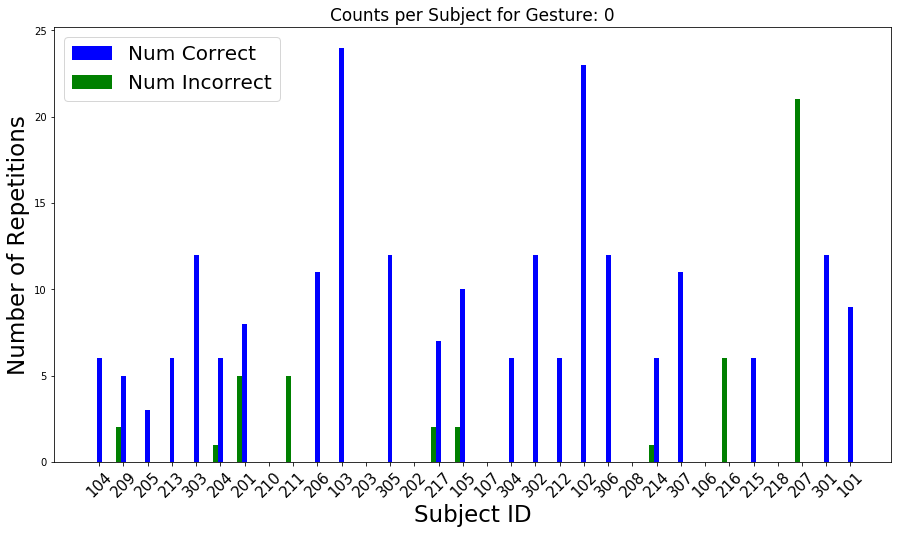

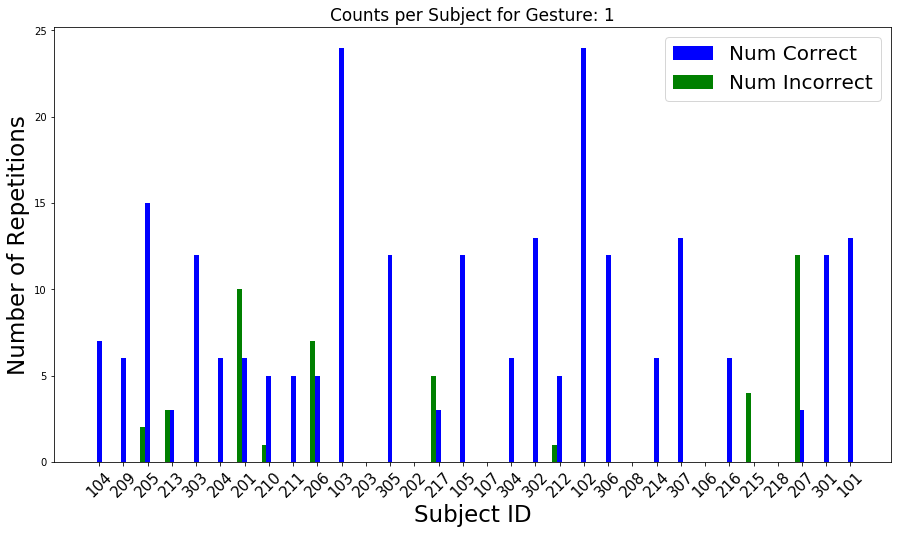

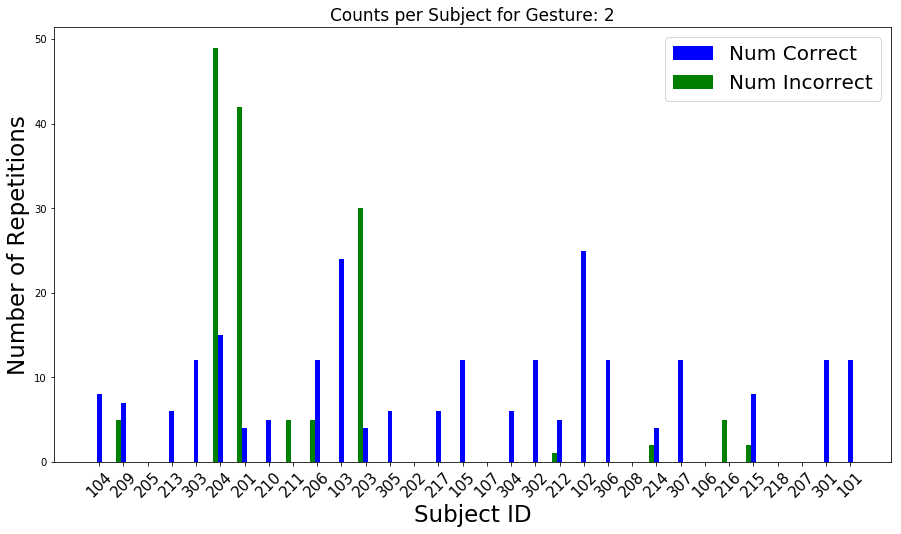

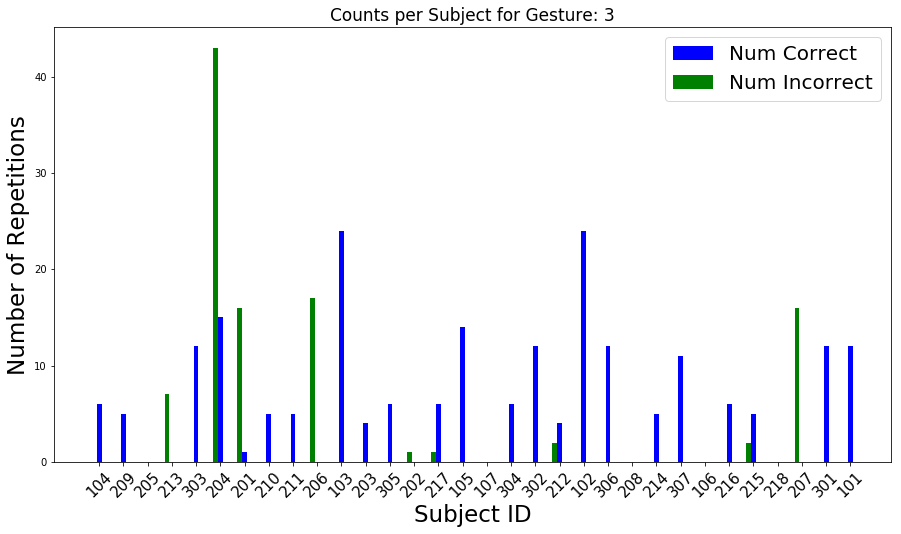

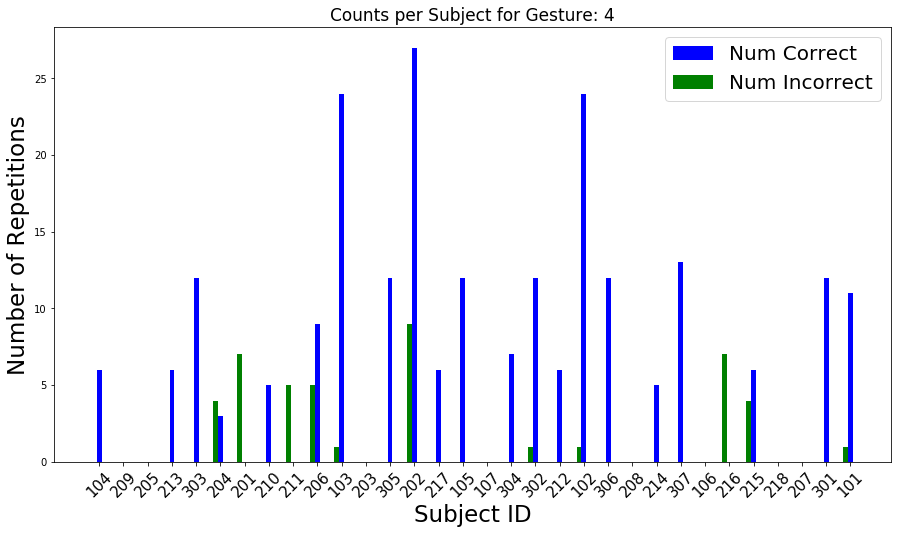

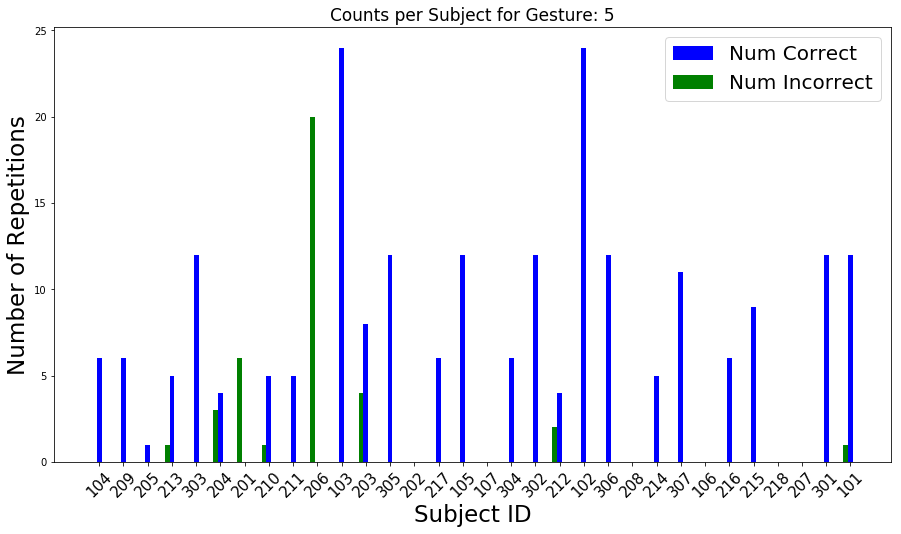

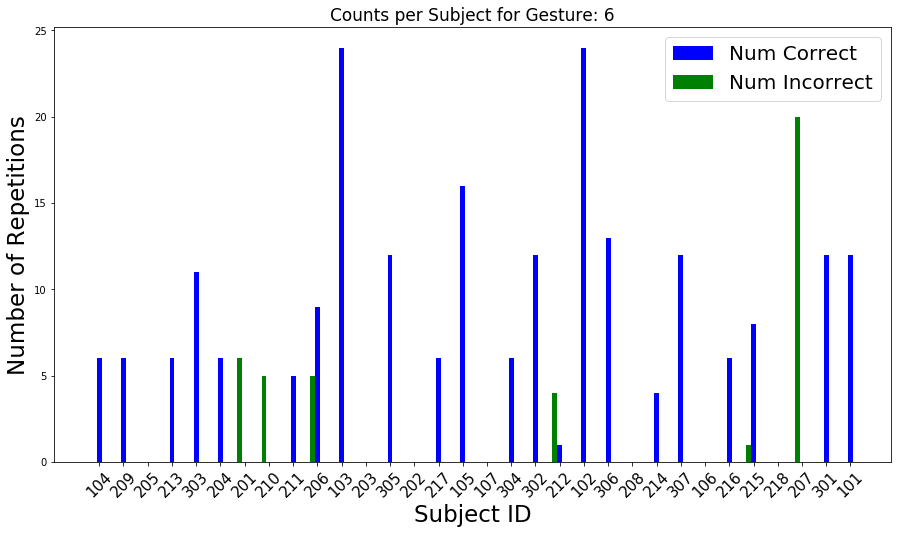

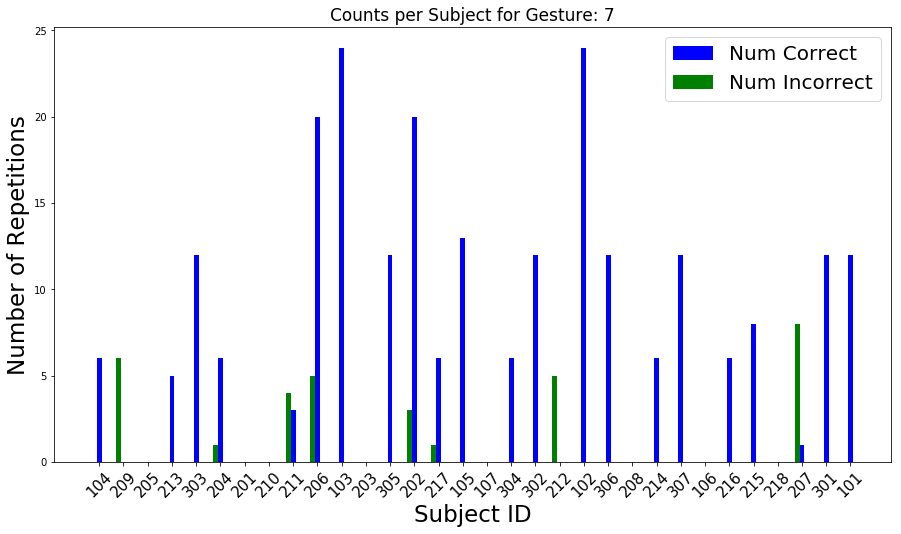

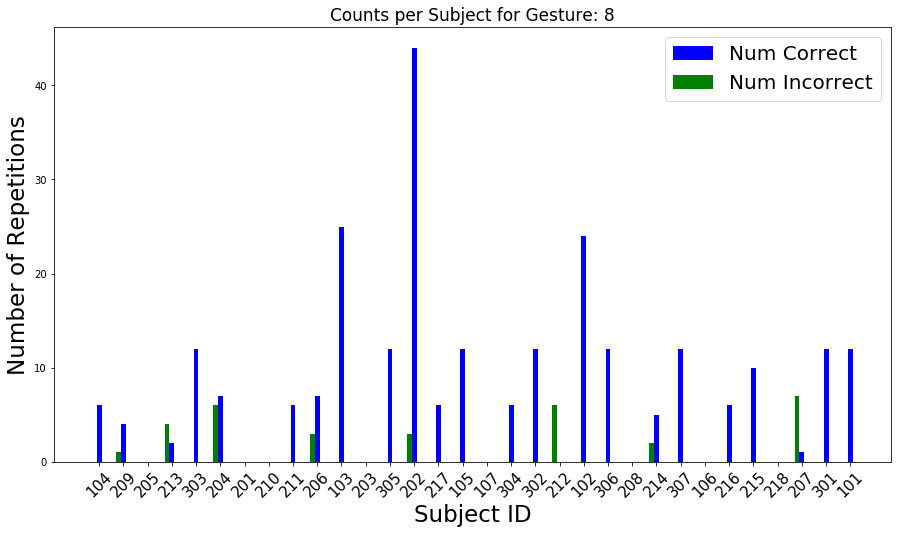

In [3]:
subj_correct_stats = {}
subj_incorrect_stats = {}

# remember filenames look like:
# patientid_date_label_repetitionNumber_correction_position.txt
gestures = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
m = []
for gesture in gestures:
    #print('Gestures: ',gesture)
    for subj in subjects:
        #print('Subj: ',subj)
        for label in labels:
            count = 0
            #print('Label: ',label)
            file_list = glob.glob(data_path+subj+'_*_'+gesture+'_*_'+label+'_*.txt')               
            #print('Count: ',len(file_list))
            if label == '1':
                subj_correct_stats[subj] = len(file_list)
            else:
                subj_incorrect_stats[subj] = len(file_list)  
    
    # Now plot
    X = np.arange(len(subj_correct_stats))

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1,1,1)


    ax.bar(X, subj_correct_stats.values(), width=0.2, color='b', align='center')
    ax.bar(X-0.2, subj_incorrect_stats.values(), width=0.2, color='g', align='center')
    ax.legend(('Num Correct','Num Incorrect'), fontsize=20)

    plt.xticks(X, subj_correct_stats.keys(), fontsize=15)
    plt.xlabel('Subject ID', fontsize=23)
    ax.tick_params(axis='x', rotation=45)
    plt.ylabel('Number of Repetitions', fontsize=23)
    plt.title("Counts per Subject for Gesture: "+gesture, fontsize=17)
    plt.show()
    #print(m)      

### Check and plot the number of correct and incorrect episodes for each gesture

In [4]:
correct_stats = {}
incorrect_stats = {}
# patientid_date_label_repetitionNumber_correction_position.txt
gestures = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
m = []
for gesture in gestures:
    #print('Gesture: ',gesture)
    for label in labels:
        count = 0
        #print('Label: ',label)
        for subj in subjects:
            #print('Subj: ',subj)
            for file_name in glob.glob(data_path+subj+'_*_'+gesture+'_*_'+label+'_*.txt'):
                tmp_df = pd.read_csv(file_name,header=None)
                m.append(tmp_df.shape[0])
                count += 1
        #print('Count: ',count)
        if label == '1':
            correct_stats[gesture] = count
        else:
            incorrect_stats[gesture] = count
#print(m)            

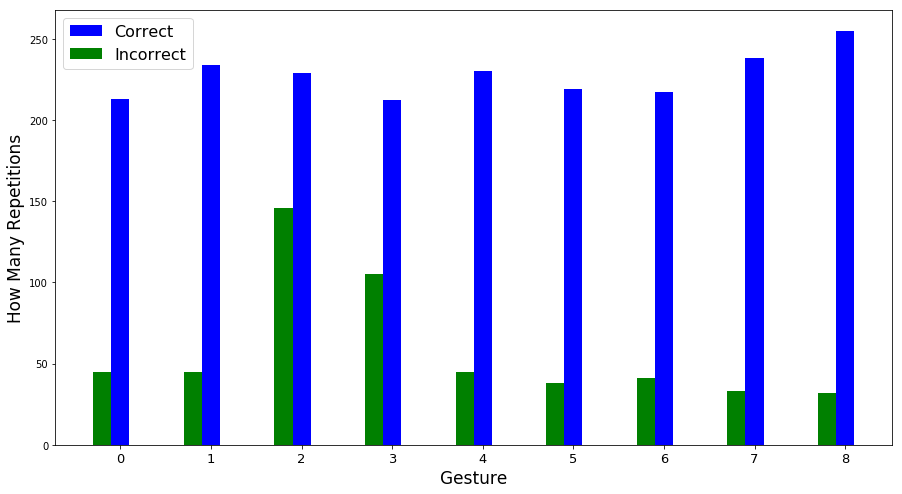

In [5]:
X = np.arange(len(correct_stats))

# original data is at top left
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)


ax.bar(X, correct_stats.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, incorrect_stats.values(), width=0.2, color='g', align='center')
ax.legend(('Correct','Incorrect'),fontsize=16)

plt.xticks(X, correct_stats.keys(),fontsize=13)
plt.xlabel('Gesture', fontsize=17)
#ax.tick_params(axis='x', rotation=45)
plt.ylabel('How Many Repetitions', fontsize=17)
    
#plt.title("Move Counts", fontsize=17)
plt.show()